K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv('Europe_Countries.csv')
dataframe.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


In this project, we use a dataset containing statistical and demographic information about various European countries. Each row represents a country, and the columns include numerical features that help in analyzing and grouping countries based on similarities.

In [3]:
data = dataframe.iloc[:,1:8]
data.head()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


In the above cell we created  a new dataframe with only the relevant variables for Clustering.

Before applying K-Means clustering, it is important to normalize the features so that each one contributes equally to the distance calculations. To standardize the features, we use StandardScaler from Scikit-learn, which transforms the data as shown below.

In [4]:
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
data_scaled.head()

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,-0.507835,0.683900,0.114447,0.570778,-1.024347,-0.176789,-1.245527
1,-0.835987,0.417061,0.114447,0.487756,-0.388952,-0.115927,-0.592442
2,-0.341689,-1.268238,0.624255,-1.367473,1.263074,-1.860631,-0.069973
3,-0.675636,-0.973310,-0.759511,-0.680942,0.996208,-0.420236,1.693357
4,-0.538618,-0.334301,-1.050830,-0.237093,-0.579571,-0.501385,-0.309438


After scaling the dataset, we now apply the K-Means clustering algorithm to group the countries into distinct clusters based on their features.

We initialize K-Means with a chosen number of clusters (e.g., 3), and then fit the model to the scaled data. The algorithm assigns each country to one of the clusters based on its similarity (Euclidean distance) to the cluster centroids.

In [5]:
k_means = KMeans(n_clusters = 3,random_state=9)
k_means.fit(data_scaled)

KMeans(n_clusters=3, random_state=9)

In [6]:
k_means.inertia_

111.3577735026673

In [7]:
cluster = k_means.fit_predict(data_scaled)
cluster

array([0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 2, 2, 0, 1, 2], dtype=int32)

After fitting the model, we retrieve the cluster labels using kmeans.labels_ and add them as a new column to the original dataset. This helps us analyze and visualize which countries belong to which cluster. Each row in the dataset now includes a Cluster column indicating which group the country was assigned to.



In [8]:
dataframe['Cluster']=cluster
dataframe.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Cluster
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2,0
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2,0
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6,1
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7,1
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5,0


In [9]:
df = dataframe.drop(['Country'],axis=1)
df_clust = df.groupby('Cluster').mean()
df_clust

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
Cluster,,,,,,,
0,81884.100,44290.0,2.5500,79.91900,1.0850,0.4820,6.40
1,142116.100,18720.0,4.1800,74.54100,1.6820,-0.3400,12.42
2,302478.625,32750.0,3.2875,80.35375,2.1625,0.2325,11.20


In [10]:
dataframe.groupby('Cluster')['Country'].count()

,Country
Cluster,
0,10
1,10
2,8


Inertia measures how tightly the data points in each cluster are grouped around their centroid. It is calculated as the sum of squared distances between each data point and the center of its assigned cluster.Lower inertia means the points are closer to their cluster centroids — i.e., tighter clusters.

In [14]:
k_means.inertia_

111.3577735026673

Inertia always decreases as you increase the number of clusters, so we don’t simply choose the model with the lowest inertia.

Instead, we use the Elbow Method to find the point where adding more clusters no longer significantly reduces inertia.


In K-Means clustering, we must manually specify the number of clusters (k) to form. Choosing the right value of k is crucial for meaningful clustering.

One of the most common techniques for this is the Elbow Method.

We run K-Means clustering for a range of k values (e.g., from 1 to 10).

For each k, we calculate the inertia (WSS – within-cluster sum of squares).

We then plot k vs. inertia.

As k increases, inertia decreases, but at some point the decrease becomes minimal — this point is called the “elbow.”

The elbow point represents the optimal number of clusters — it’s the balance between low inertia and simplicity.

In [15]:
wss =[]

In [16]:
for i in range(2,9):
    KM = KMeans(n_clusters=i,random_state=9)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

In [17]:
wss

[134.09141707466745,
 111.3577735026673,
 92.981027351974,
 73.22946533459732,
 64.14054839002881,
 53.79689308178636,
 44.900197247435294]

In [18]:
for i in range(2,9):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 134.09141707466745
The WSS value for 3 clusters is 111.3577735026673
The WSS value for 4 clusters is 92.981027351974
The WSS value for 5 clusters is 73.22946533459732
The WSS value for 6 clusters is 64.14054839002881
The WSS value for 7 clusters is 53.79689308178636
The WSS value for 8 clusters is 44.900197247435294


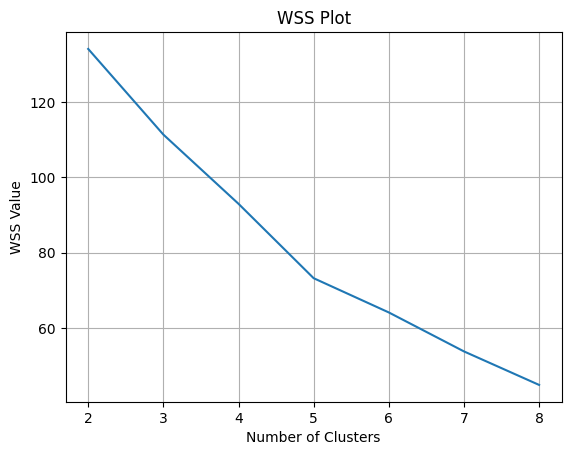

In [19]:
plt.plot(range(2,9), wss)
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

In [20]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(data_scaled)
labels = k_means.labels_
labels

array([0, 1, 3, 1, 1, 1, 3, 2, 2, 4, 3, 0, 0, 2, 3, 3, 0, 0, 2, 3, 1, 1,
       1, 2, 2, 0, 3, 2], dtype=int32)

In [21]:
dataframe["Cluster"] = labels
dataframe.head()

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Cluster
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2,0
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2,1
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6,3
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7,1
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5,1


In [22]:
dataframe.to_csv('KMeans Outpput.csv')

In [23]:
# For ease of viewing the numbers, display only 3 digits after decimal point
pd.set_option('display.precision', 3)

In [24]:
df = dataframe.drop(['Country'],axis=1)
df_clust = df.groupby('Cluster').mean()
df_clust = df_clust.reset_index()
df_clust

,Cluster,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,0,57091.667,47933.333,2.667,80.510,0.867,0.720,6.483
1,1,52925.857,27914.286,2.843,77.716,1.603,0.024,11.029
2,2,359940.571,37957.143,2.943,80.629,1.800,0.279,8.971
3,3,185037.000,16728.571,4.829,73.701,1.664,-0.460,11.643
4,4,131957.000,26300.000,3.300,80.050,4.300,0.060,17.400


In [25]:
cluster_freq = dataframe['Cluster'].value_counts().sort_index()
cluster_freq

,count
Cluster,
0,6
1,7
2,7
3,7
4,1


In [26]:
df_clust['Frequency'] = cluster_freq.values
df_clust

,Cluster,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,Frequency
0,0,57091.667,47933.333,2.667,80.510,0.867,0.720,6.483,6
1,1,52925.857,27914.286,2.843,77.716,1.603,0.024,11.029,7
2,2,359940.571,37957.143,2.943,80.629,1.800,0.279,8.971,7
3,3,185037.000,16728.571,4.829,73.701,1.664,-0.460,11.643,7
4,4,131957.000,26300.000,3.300,80.050,4.300,0.060,17.400,1


We successfully applied K-Means clustering to group European countries based on their socio-economic indicators.

The Elbow Method helped determine the optimal number of clusters.

We visualized the clusters to gain insights from the data.

This project demonstrates how unsupervised learning techniques like K-Means can reveal hidden structure in real-world datasets.

